In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

try:
    df = pd.read_csv('movies.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('movies.csv', encoding='latin-1')  
    except UnicodeDecodeError:
        df = pd.read_csv('movies.csv', encoding='utf-8', errors='replace')  

# Ejercicio 3

In [113]:
qual_vars = ['originalLanguage', 'genres', 'productionCompany', 'productionCountry']

for var in qual_vars:
    print(f"\nFrecuencia de {var}:")
    print(df[var].value_counts().head(10))



Frecuencia de originalLanguage:
originalLanguage
en    7772
ja     644
es     425
fr     271
ko     167
zh     119
it     100
de      84
cn      80
ru      67
Name: count, dtype: int64

Frecuencia de genres:
genres
Drama              521
Comedy             440
Horror             230
Drama|Romance      211
Horror|Thriller    205
Comedy|Romance     201
Documentary        194
Comedy|Drama       140
Action|Thriller    121
Action             112
Name: count, dtype: int64

Frecuencia de productionCompany:
productionCompany
Paramount                 55
Universal Pictures        50
Warner Bros. Pictures     37
Toei Animation            34
DreamWorks Animation      33
Columbia Pictures         32
Walt Disney Pictures      31
The Asylum                31
Marvel Studios            31
Warner Bros. Animation    29
Name: count, dtype: int64

Frecuencia de productionCountry:
productionCountry
United States of America                   4971
Japan                                       613
United Kingd

# a. 10 películas con mayor presupuesto

In [114]:
top_budget_movies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)
top_budget_movies

,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4710,Avengers: Age of Ultron,365000000
5952,Avengers: Endgame,356000000
5953,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
4953,Justice League,300000000
607,Superman Returns,270000000
3791,Tangled,260000000
7134,The Lion King,260000000
280,Spider-Man 3,258000000


# c. Película con más votos

In [115]:
most_voted_movie = df[['title', 'voteCount']].sort_values(by='voteCount', ascending=False).head(1)
most_voted_movie

,title,voteCount
3511,Inception,30788


In [126]:
top_popular_movies = df[['title', 'popularity', 'revenue', 'budget', 'voteCount']].sort_values(by='popularity', ascending=False).head(10)
print(top_popular_movies)

                                       title  popularity       revenue  \
8225                                Eternals   11474.647  4.018423e+08   
9049                 Spider-Man: No Way Home    8443.740  1.631853e+09   
7352                                  Sing 2    6055.643  2.150000e+08   
7614  Resident Evil: Welcome to Raccoon City    5887.379  3.100000e+07   
8556                                 Encanto    5804.441  2.150000e+08   
7179                 Ghostbusters: Afterlife    5051.222  1.910000e+08   
9898                           Last Man Down    4789.705  0.000000e+00   
8995                The Matrix Resurrections    3828.374  1.480000e+08   
8650             Venom: Let There Be Carnage    3062.764  5.000000e+08   
9485                          Mother/Android    2466.985  0.000000e+00   

         budget  voteCount  
8225  200000000       3429  
9049  200000000       5630  
7352   85000000       1288  
7614   40000000        995  
8556   50000000       3363  
7179   7500

In [127]:
inception_movies = df[df['title'].str.contains('Inception', case=False, na=False)]
print(inception_movies[['title', 'releaseDate', 'voteAvg']])


          title releaseDate  voteAvg
3511  Inception  2010-07-15      8.4


# e. Películas por año

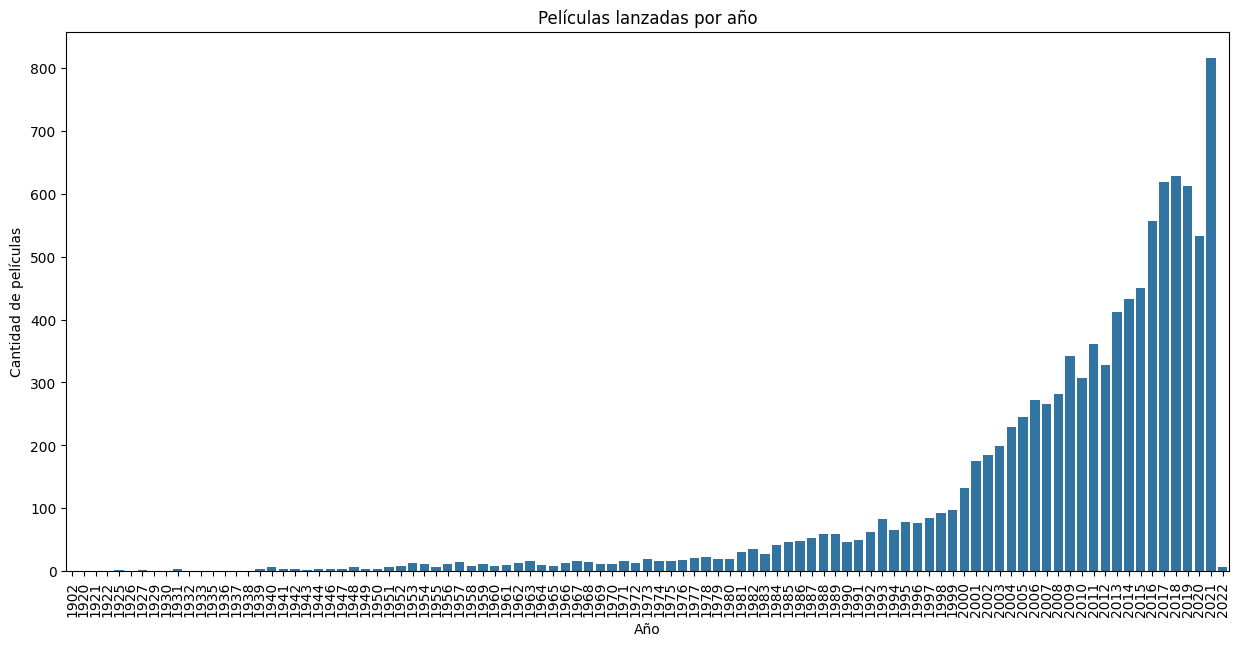

In [116]:
df['release_year'] = pd.to_datetime(df['releaseDate']).dt.year
peliculas_por_ano = df['release_year'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(x=peliculas_por_ano.index, y=peliculas_por_ano.values)
plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Películas lanzadas por año')
plt.show()

In [117]:
print(f"Año con más películas: {peliculas_por_ano.idxmax()} ({peliculas_por_ano.max()} películas)")

Año con más películas: 2021 (816 películas)


# g. Género con mayores ganancias

genres
Family|Fantasy|Romance                             1.103521e+09
Action|Animation|Comedy|Family|Adventure           9.515526e+08
Family|Adventure|Animation|Comedy|Fantasy|Drama    8.983946e+08
Family|Adventure|Drama|Fantasy                     7.915506e+08
Science Fiction|Adventure|Family|Fantasy           7.824655e+08
Animation|Family|Comedy|Fantasy|Adventure          7.787608e+08
Adventure|Family|Animation                         7.456608e+08
Family|Animation|Drama                             7.184556e+08
Action|Adventure|Science Fiction|Drama             7.051669e+08
Action|Comedy|Mystery                              6.862576e+08
Name: profit, dtype: float64


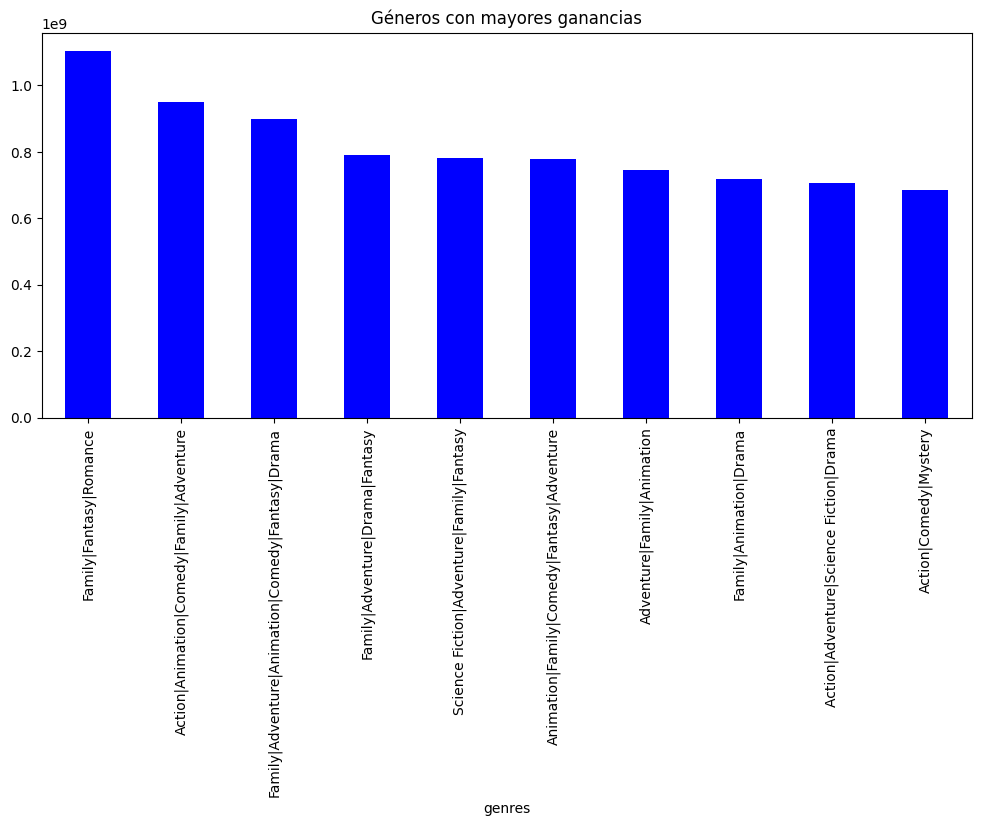

In [118]:
df['profit'] = df['revenue'] - df['budget']

genres_profit = df.groupby('genres')['profit'].mean().sort_values(ascending=False)
print(genres_profit.head(10))

plt.figure(figsize=(12,5))
genres_profit.head(10).plot(kind='bar', color='blue')
plt.title("Géneros con mayores ganancias")
plt.show()


# i. Influencia del reparto en popularidad e ingresos

In [119]:
numeric_columns = ['castMenAmount', 'castWomenAmount', 'popularity', 'revenue']
df_clean = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if necessary
df_clean = df_clean.dropna()

# Compute correlation matrix
correlation_matrix = df_clean.corr()
print(correlation_matrix)

                 castMenAmount  castWomenAmount  popularity   revenue
castMenAmount         1.000000        -0.090474    0.002779 -0.060143
castWomenAmount      -0.090474         1.000000    0.038939  0.290070
popularity            0.002779         0.038939    1.000000  0.162495
revenue              -0.060143         0.290070    0.162495  1.000000


# k. Correlación entre presupuesto e ingresos

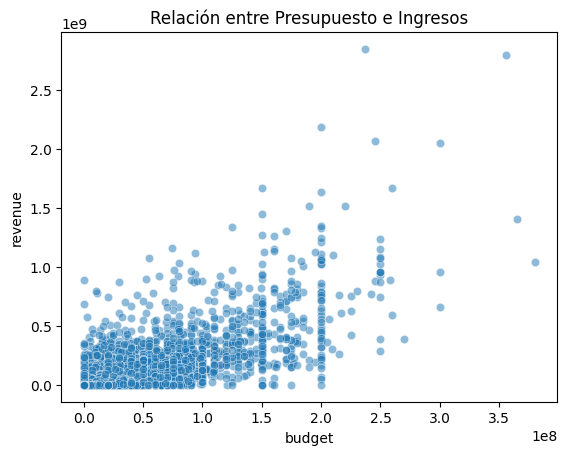

In [120]:
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.title("Relación entre Presupuesto e Ingresos")
plt.show()

In [121]:
corr = df[['budget', 'revenue']].corr()
print(f"Correlación presupuesto-ingresos: {corr.loc['budget', 'revenue']:.2f}")

Correlación presupuesto-ingresos: 0.76


# m. Meses con mejores ingresos

releaseMonth
6     9.474711e+07
5     8.784544e+07
7     7.602870e+07
12    7.435888e+07
11    7.149211e+07
4     5.259565e+07
3     5.111594e+07
2     4.290835e+07
10    3.898733e+07
8     3.597008e+07
1     3.377369e+07
9     3.192892e+07
Name: revenue, dtype: float64


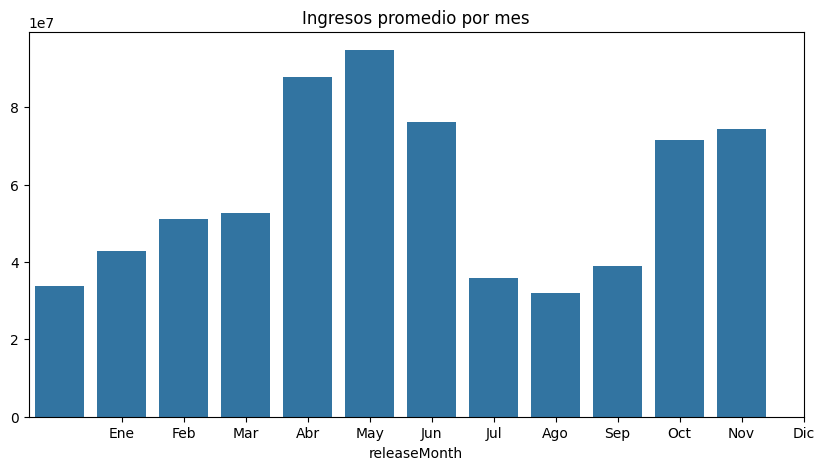

In [122]:
df['releaseMonth'] = pd.to_datetime(df['releaseDate']).dt.month

monthly_revenue = df.groupby('releaseMonth')['revenue'].mean().sort_values(ascending=False)
print(monthly_revenue)

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title("Ingresos promedio por mes")
plt.show()


## Promedio de películas por mes

In [123]:
monthly_count = df['releaseMonth'].value_counts().sort_index()
print(f"Promedio de películas lanzadas por mes: {monthly_count.mean():.2f}")

Promedio de películas lanzadas por mes: 833.33


# o. Estrategias de marketing

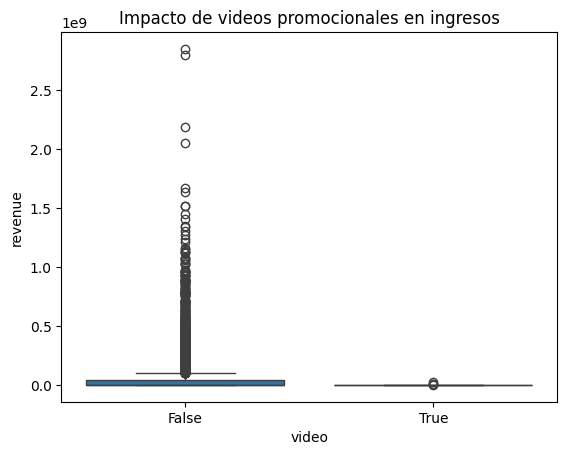

In [124]:
sns.boxplot(x='video', y='revenue', data=df)
plt.title("Impacto de videos promocionales en ingresos")
plt.show()

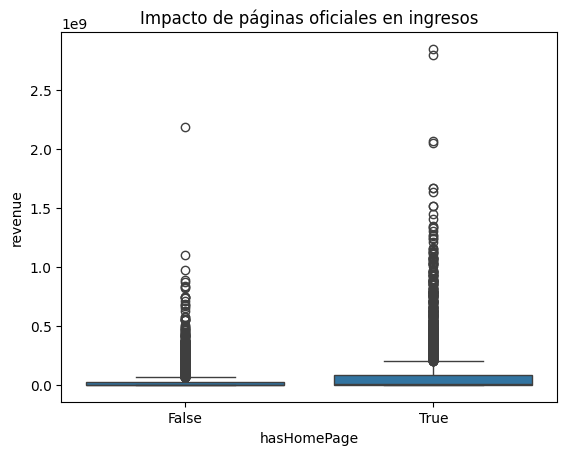

In [125]:
df['hasHomePage'] = df['homePage'].notnull()
sns.boxplot(x='hasHomePage', y='revenue', data=df)
plt.title("Impacto de páginas oficiales en ingresos")
plt.show()